In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_excel('C:/Users/aravi/Downloads/predict_fair_airline_datasets/Data_Train.xlsx')

In [3]:
data.head()#checking the head of the dataframe

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.isnull().sum()#checking the null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data.dropna(inplace = True)#I just simply drop the null values

In [6]:
data.isna().sum()#now, it's look better :)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.dtypes#checking the datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
#let's create a function that will change the datatype

In [9]:
def change_type(a):
    data[a] = pd.to_datetime(data[a])
    

In [10]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:#this i iterator will iteratae eveything
    change_type(i)

In [12]:
data.dtypes# we changed the datatype


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
#lets tell to our machine to what is date and month

In [14]:
data['journey_day'] = data['Date_of_Journey'].dt.day#dt is the function that will help to retrive the date
data['journey_month'] = data['Date_of_Journey'].dt.month#same here.

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-08-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-05 05:50:00,2021-08-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-08-05 18:05:00,2021-08-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-08-05 16:50:00,2021-08-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
data.drop('Date_of_Journey',axis = 1, inplace = True)

In [17]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-08-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-08-05 05:50:00,2021-08-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-08-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-08-05 18:05:00,2021-08-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-08-05 16:50:00,2021-08-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
data.shape

(10682, 12)

In [19]:
def extract_hour(df,col):#just get the the arrival and dep time to normal numbers
    df[col+"_hour"]=df[col].dt.hour
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [20]:
extract_hour(data,'Dep_Time')
extract_hour(data,'Arrival_Time')
extract_min(data,'Dep_Time')
extract_min(data,'Arrival_Time')
drop_column(data,'Dep_Time')
drop_column(data,'Arrival_Time')


In [21]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


## Data Preprocessing

In [22]:
duration = list(data['Duration'])

In [23]:
for i in range(len(duration)): # just we are doing the preprocessing because of missing values
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   
            duration[i]=duration[i] + ' 0m'      
        else:
            duration[i]='0h '+ duration[i]

In [24]:
data['Duration'] = duration

In [25]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [26]:
def hours(a):
    return a.split(' ')[0][0:-1]
def minute(b):
    return b.split(' ')[1][0:-1]

In [27]:
data['Duration_hours'] = data['Duration'].apply(hours)

In [28]:
data['Duration_minute'] = data['Duration'].apply(minute)

In [29]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35,4,45


In [30]:
drop_column(data,'Duration')

In [31]:
data['Duration_hours'] = data['Duration_hours'].astype(int)
data['Duration_minute'] = data['Duration_minute'].astype(int)

In [32]:
data_cats = [bc for bc in data.columns if data[bc].dtype == 'O']

In [33]:
data_cats #this are all categorical datas

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [34]:
data_cat = [bc for bc in data.columns if data[bc].dtype != 'O']

In [35]:
data_cat#numerical 

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_minute']

In [36]:
categorical = data[data_cats]

In [37]:
categorical.head()#our categorical data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

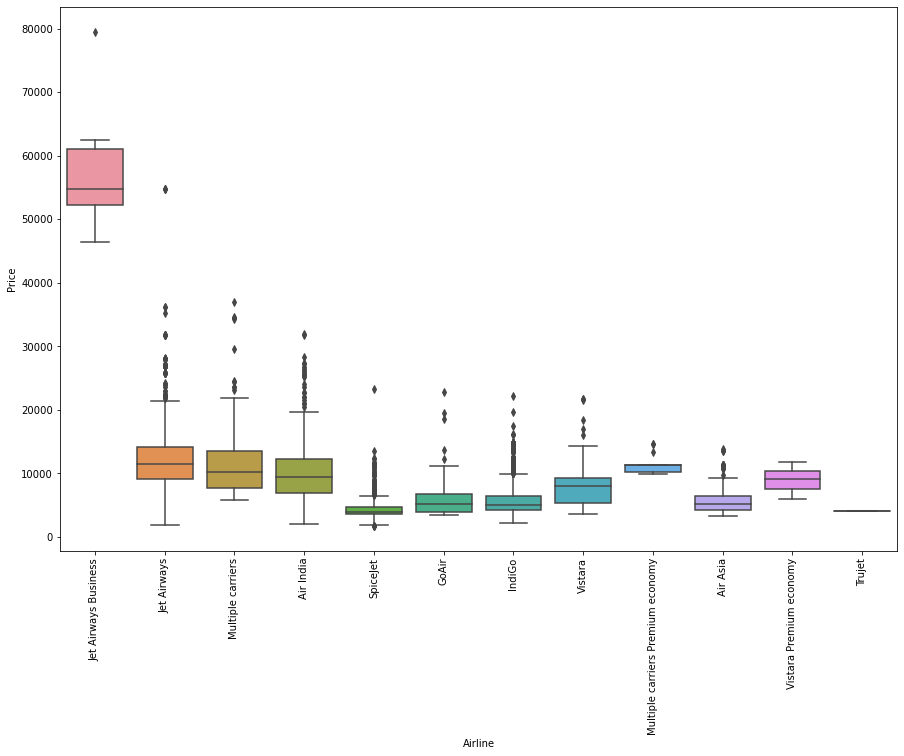

In [39]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Airline',y = 'Price',data = data.sort_values('Price',ascending = False))
plt.xticks(rotation = 90);

In [40]:
#jet airways has highest

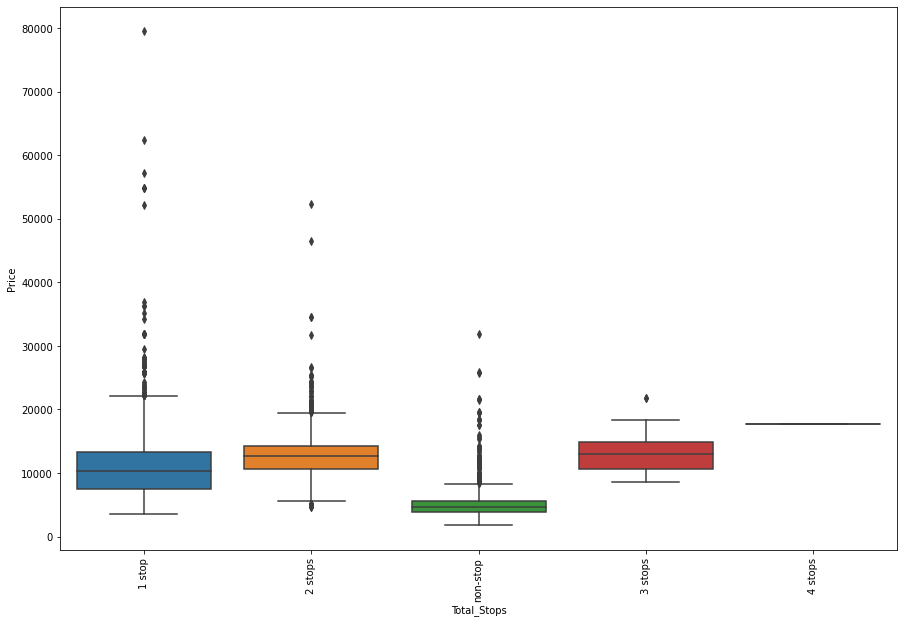

In [41]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Total_Stops',y = 'Price',data = data.sort_values('Price',ascending = False))
plt.xticks(rotation = 90);

In [42]:
#that mean the company who have more stops they have higher fare

In [43]:
#lets do one hot encoding

In [44]:
Airline = pd.get_dummies(categorical['Airline'], drop_first = True)

In [45]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

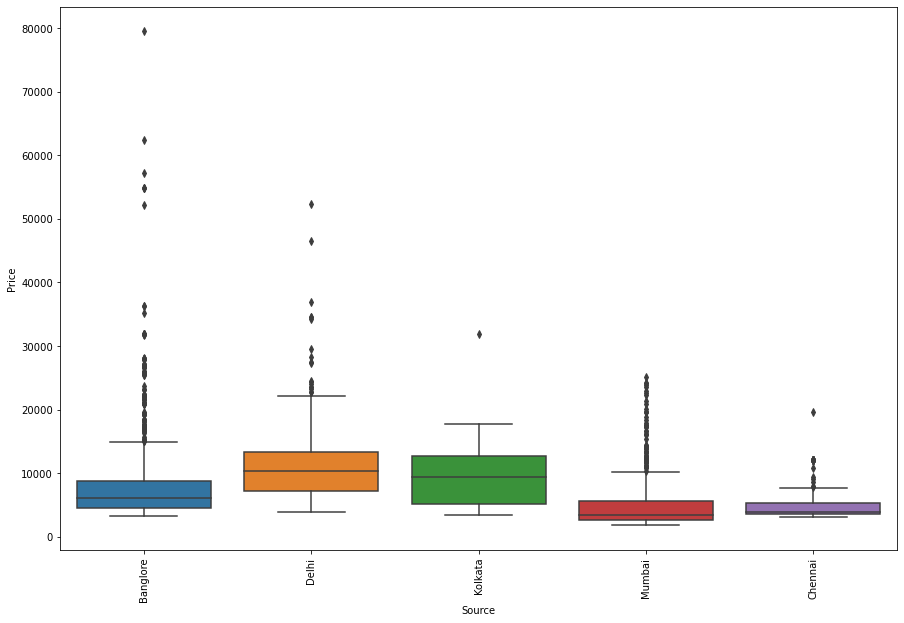

In [47]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Source',y = 'Price',data = data.sort_values('Price',ascending = False))
plt.xticks(rotation = 90);

In [48]:
Source = pd.get_dummies(categorical['Source'], drop_first = True)

In [49]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [50]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

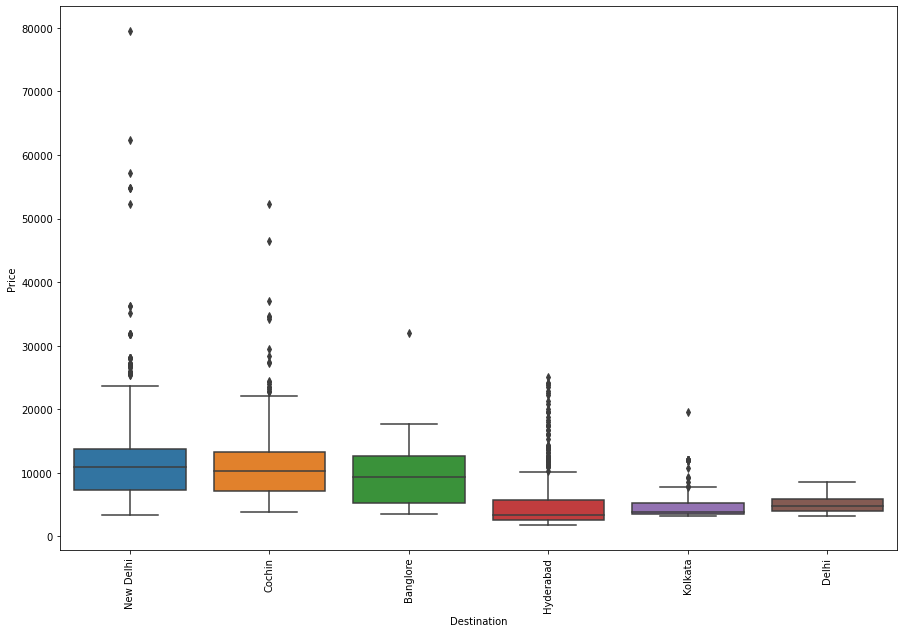

In [51]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Destination',y = 'Price',data = data.sort_values('Price',ascending = False))
plt.xticks(rotation = 90);

In [52]:
Destination = pd.get_dummies(categorical['Destination'], drop_first = True)

In [53]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]# we are just separting the values
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-54-ed853c737801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]# we are just separting the values
<ipython-input-54-ed853c737801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-54-ed853c737801>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [55]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [56]:

drop_column(categorical,'Route')

C:\Users\aravi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [58]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace = True);

C:\Users\aravi\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [59]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [60]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [61]:
#we choose lable encoder because it has more number of feature 

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
encoder = LabelEncoder()

In [64]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [65]:
for i in[ 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i]);

<ipython-input-65-0a99cd4bcb52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i]);


In [66]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [67]:
drop_column(categorical,'Additional_Info')

C:\Users\aravi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
categorical['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [69]:
dic = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}#we use dictionary to change the values

In [70]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dic)

<ipython-input-70-209cad975ba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dic)


In [71]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [72]:
data = pd.concat([categorical,Airline,Source,Destination,data[data_cat]],axis = 1)

In [73]:
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,1,20,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,13,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,4,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,23,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,21,50,35,4,45


In [74]:
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')



In [75]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,21,50,35,4,45


In [76]:
pd.set_option('display.max_columns',35)
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_minute,Arrival_Time_minute,Duration_hours,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,1,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,13,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,4,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,23,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,21,50,35,4,45


In [77]:
#whenever you want to see outliers we use two major plots 1.box , 2.Dist

In [78]:
def plot(df,col):
    #plt.figure(figsize = (15,10))
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


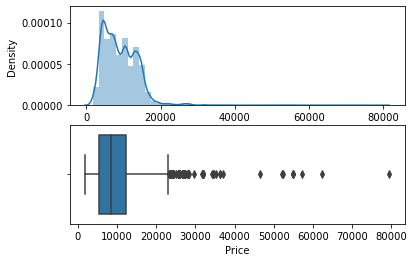

In [79]:
plot(data,'Price')

In [80]:
data['Price'] = np.where(data['Price']>=40000,data['Price'].median(),data['Price'])#we can consider that after 40000 its a oulier

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


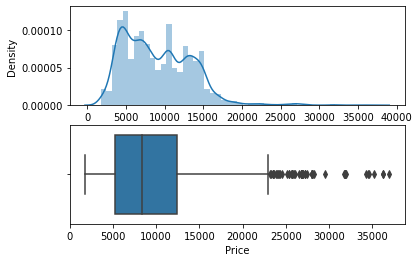

In [81]:
plot(data,'Price')

In [82]:
X = data.drop('Price',axis = 1)
y = data['Price']

## Feature selection

In [83]:
from sklearn.feature_selection import mutual_info_classif#this is the techinque used to find the important feature

In [84]:
imp = pd.DataFrame(mutual_info_classif(X,y),index = X.columns)

In [85]:
imp

,0
Total_Stops,2.121815
Route_1,2.013373
Route_2,2.807315
Route_3,2.254281
Route_4,1.523976
Route_5,0.719656
Air India,0.751123
GoAir,0.093484
IndiGo,0.655918
Jet Airways,0.950139


In [86]:
imp.columns = ['importance']


In [87]:
imp.sort_values(by = 'importance', ascending = False)#

,importance
Route_2,2.807315
Route_3,2.254281
Total_Stops,2.121815
Route_1,2.013373
Arrival_Time_hour,1.863729
Duration_hours,1.757261
Delhi,1.562018
Route_4,1.523976
Arrival_Time_minute,1.522528
Cochin,1.516725


## let's start the prediction

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [90]:
from sklearn import metrics

In [140]:
import pickle
def Model(ml_model,dump): #create a function for all models
    model = ml_model.fit(X_train,y_train)
    print('Trainning_score: {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are {}:\n'.format(y_prediction))
    r_score = metrics.r2_score(y_test,y_prediction)
    print('R2 Score is {}'.format(r_score))
    print('MAE IS :', metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE IS :', metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE IS :', np.sqrt(metrics.mean_absolute_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    if dump == 1:
        file = open('C:/Users/aravi/Downloads/predict_fair_airline_datasets/Model.pkl','wb')
        pickle.dump(Model,file)


In [92]:
from sklearn.ensemble import RandomForestClassifier

Trainning_score: 0.8882387361029842
Predictions are [12898.  8529. 14714. ... 11245. 15764. 11150.]:

R2 Score is 0.658537588873984
MAE IS : 1440.3570425830603
MSE IS : 6514888.194197473
RMSE IS : 37.95203607954467


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


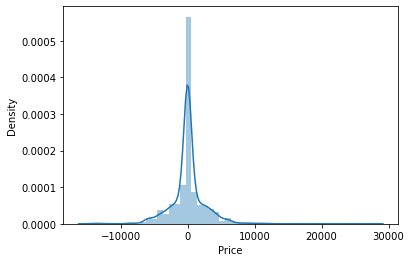

In [93]:
Model(RandomForestClassifier())

In [94]:
#usually my lap took more time to do this, if you have good one play around various number techinques you known 

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


Trainning_score: 0.6196543396258971
Predictions are [10785.32964395 11434.78175186 12408.81879662 ... 16423.35569334
 12425.59093102 13909.08821934]:

R2 Score is 0.598595599146022
MAE IS : 1978.896096667158
MSE IS : 7658543.684497654
RMSE IS : 44.48478500192125


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


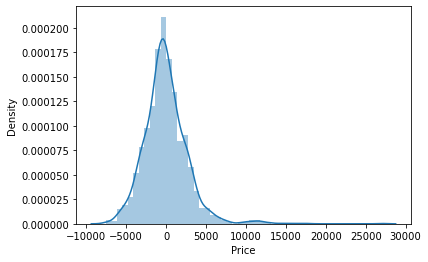

In [100]:
Model(LinearRegression(),0)

Trainning_score: 0.9678970587253048
Predictions are [12898.          8529.         14714.         ... 11245.
 15764.         13102.66666667]:

R2 Score is 0.689802357976377
MAE IS : 1338.195367337389
MSE IS : 5918376.049719232
RMSE IS : 36.58135272700272


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


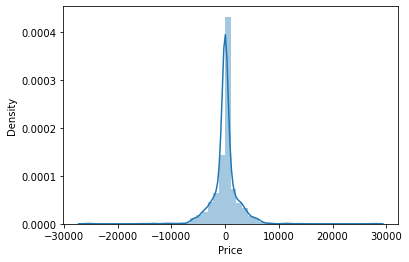

In [141]:
Model(DecisionTreeRegressor(),1)

Trainning_score: 0.7834318006850665
Predictions are [11316.4  9645.6 11885.2 ...  6174.2 15436.6 13451.2]:

R2 Score is 0.6250978076792748
MAE IS : 1771.9811885821243
MSE IS : 7152898.2023958815
RMSE IS : 42.09490691974653


C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


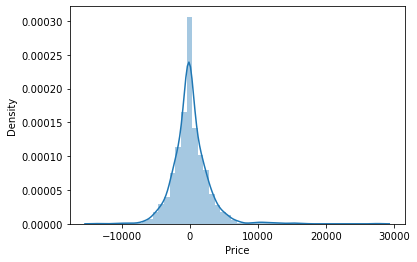

In [103]:
Model(KNeighborsRegressor(),0)

In [109]:
#lets do the hyperparameter tunning ..........................

In [111]:
from sklearn.model_selection import RandomizedSearchCVdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaEAAAEGCAYAAADMsSqUAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAAq5ElEQVR4nO3de3Sc9X3n8fd3RvebJVmS78YGBMSQcFPAuZAmpVCgTU0v7IHQQlN2KUnopt3T3XW6S8/u2e5Z2rOnZ0uTQklCatolQLdpcBoS4nhJNiRgEMHgCxgL28h3S5ZtSdZ1NN/9Y35jBlmX0WX0zMif1zlzZub3/H7P851HI331/J7f83vM3REREYlCLOoARETk3KUkJCIikVESEhGRyCgJiYhIZJSEREQkMkVRB5CvGhoafNWqVVGHISJSUF599dVOd2/Mtr6S0DhWrVpFa2tr1GGIiBQUM3t3KvXVHSciIpFREhIRkcgoCYmISGSUhEREJDJKQiIiEhklIRERiYySkIiIREZJSEREIqMkJCIikdGMCXLOeGJL+1lln7l2ZQSRiEhaTo+EzOwmM9tlZm1mtn6M5WZmD4Xlb5jZVZO1NbN6M9tkZrvDc10ov8bMtobH62b26xltrjazbWFdD5mZ5fJzi4hIdnKWhMwsDnwFuBlYA9xhZmtGVbsZaA6Pe4GHs2i7Htjs7s3A5vAeYDvQ4u5XADcBf2tm6SO9h8P609u6aVY/rIiITEsuj4SuAdrcfY+7DwFPAutG1VkHPO4pLwG1ZrZkkrbrgA3h9QbgVgB373P3RCgvAxwgrK/G3V90dwceT7cREZFo5TIJLQP2Z7w/EMqyqTNR20XufhggPDelK5nZtWa2A9gG3BeS0rLQfqI40u3vNbNWM2vt6OjI6kOKiMj05TIJjXXexbOsk03bsyu4b3H3S4EPA18ys7KprMvdH3X3FndvaWzM+nYYIiIyTblMQgeAFRnvlwOHsqwzUdujoYst3dV2bPSG3f1N4DRwWVjX8kniEBGRCOQyCb0CNJvZajMrAW4HNo6qsxG4K4ySWwucCl1sE7XdCNwdXt8NPAMQ6haF1+cBFwP7wvp6zGxtGBV3V7qNiIhEK2fXCbl7wszuB54D4sBj7r7DzO4Lyx8BngVuAdqAPuCzE7UNq34QeNrM7gHagdtC+ceB9WY2DCSBz7t7Z1j2OeDvgHLge+EhIiIRs9SAMRmtpaXFdXvv+UUXq4rknpm96u4t2dbXtD0iIhIZJSEREYmMkpCIiERGSUhERCKjJCQiIpFREhIRkcgoCYmISGSUhEREJDJKQiIiEhklIRERiYySkIiIREZJSEREIqMkJCIikVESEhGRyCgJiYhIZJSEREQkMkpCIiISGSUhERGJjJKQiIhERklIREQioyQkIiKRURISEZHIKAmJiEhklIRERCQySkIiIhKZnCYhM7vJzHaZWZuZrR9juZnZQ2H5G2Z21WRtzazezDaZ2e7wXBfKbzCzV81sW3j+xYw2Pwrr2hoeTbn83CIikp2cJSEziwNfAW4G1gB3mNmaUdVuBprD417g4Szargc2u3szsDm8B+gEPu3uHwTuBv5+1LbudPcrwuPY7H1SERGZrlweCV0DtLn7HncfAp4E1o2qsw543FNeAmrNbMkkbdcBG8LrDcCtAO7+mrsfCuU7gDIzK83RZxMRkVmQyyS0DNif8f5AKMumzkRtF7n7YYDwPFbX2m8Cr7n7YEbZN0JX3ANmZmMFbGb3mlmrmbV2dHRM/OlERGTGcpmExvpD71nWyabt2Bs1uxT4c+D3M4rvDN1014XH74zV1t0fdfcWd29pbGzMZnMiIjIDuUxCB4AVGe+XA4eyrDNR26Ohy47wfOb8jpktB/4ZuMvd30mXu/vB8NwDPEGqu09ERCKWyyT0CtBsZqvNrAS4Hdg4qs5G4K4wSm4tcCp0sU3UdiOpgQeE52cAzKwW+C7wJXf/aXoDZlZkZg3hdTHwq8D2Wf+0IiIyZUW5WrG7J8zsfuA5IA485u47zOy+sPwR4FngFqAN6AM+O1HbsOoHgafN7B6gHbgtlN8PXAg8YGYPhLIbgdPAcyEBxYEfAl/N1ecWEZHsmXtWp1rOOS0tLd7a2hp1GDKLntjSflbZZ65dGUEkIvOXmb3q7i3Z1teMCXJOefXdLt4+2hN1GCISKAnJOaNvKMEzWw/x3TcORx2KiARKQnLOeH3/SRJJp6N3kGPdA1GHIyIoCck5pPXdE9RXlgCw/VB3xNGICCgJyTli+8FTHD41wMcubGBlfQU7Dp2KOiQRQUlIzhGt+7oAuHRJDZcureHwqQFOnB6KOCoRURKSc0J7Vz/FcaO6rIjz6isAONqj80IiUVMSknNCe1cf9ZUlmBm14bzQib7hiKMSESUhOSe0d52mvjJ1Z4/q0iKKYqbuOJE8oCQk8567p46EKooBUkdDFSWc6FMSEomakpDMex29gwwMJ88MzwaoryxWEhLJA0pCMu+1H+8DONMdB6SOhE7rnJBI1JSEZN5r70onoYwjoYoS+odH6BlQIhKJkpKQzHvtXX2YQV04JwRQG14fONEfVVgigpKQnAPaj/expKaMovh7X/f0UdH+cJQkItFQEpJ5r72rjxXhAtW0uopUEtKRkEi0lIRk3tt/4uwkVFESpyQeY/8JHQmJRElJSOa1kaTT2TvEoprS95WbGXWVxezv0pGQSJSUhGReO9E3xEjSaaouO2vZgvJijmn+OJFIKQnJvHasexCAxurSs5ZVlRbT0TM41yGJSAYlIZnXOnrHT0LVZUV09g6STPpchyUigZKQzGvpI52mMY+EihgecU7264JVkagoCcm8lj7nM96REKAuOZEIKQnJvNbRM0hVaREVJUVnLasuKz5TR0SikdMkZGY3mdkuM2szs/VjLDczeygsf8PMrpqsrZnVm9kmM9sdnutC+Q1m9qqZbQvPv5jR5upQ3ha2Z7n83JI/jvUMjnkUBKn7CgF09GqEnEhUcpaEzCwOfAW4GVgD3GFma0ZVuxloDo97gYezaLse2OzuzcDm8B6gE/i0u38QuBv4+4ztPBzWn97WTbP3SSWfdUyQhKrUHScSuVweCV0DtLn7HncfAp4E1o2qsw543FNeAmrNbMkkbdcBG8LrDcCtAO7+mrsfCuU7gDIzKw3rq3H3F93dgcfTbWT+65wgCZUWxSgvjp8Zxi0icy+XSWgZsD/j/YFQlk2didoucvfDAOG5aYxt/ybwmrsPhnYHJolD5qljPYM0Vo2dhMyMxurSM8O4RWTunX22dvaMdd5l9AUZ49XJpu3YGzW7FPhz4MYpxJFuey+pbjtWrlyZzeYkj/UNJegdTNBUM3YSgtSoOXXHiUQnl0dCB4AVGe+XA4eyrDNR26Ohi43wfCxdycyWA/8M3OXu72RsY/kkcQDg7o+6e4u7tzQ2Nk76ASW/pZPLeEdC6WVKQiLRyWUSegVoNrPVZlYC3A5sHFVnI3BXGCW3FjgVutgmaruR1MADwvMzAGZWC3wX+JK7/zS9gbC+HjNbG0bF3ZVuI/PbmQtVa86eNy6tqaaUY0pCIpHJWRJy9wRwP/Ac8CbwtLvvMLP7zOy+UO1ZYA/QBnwV+PxEbUObB4EbzGw3cEN4T6h/IfCAmW0Nj/T5os8BXwvbeQf4Xo4+tuSRbI+ETvUPM5gYmauwRCRDLs8J4e7Pkko0mWWPZLx24AvZtg3lx4Hrxyj/M+DPxllXK3DZVGKXwpc+whlvdFzmss7eIZbVls9JXCLyHs2YIPNWR88g8ZiduZX3WNJJSOeFRKKhJCTz1rGeARZWlhCPjT9BhpKQSLSUhGTe6ugZnHB4NnDmZne6uZ1INJSEZN7q6B3/QtW0hVWprjodCYlEQ0lI5q1j3YNj3tY7U3E8Rn1liZKQSESySkJm9k9m9itmpqQlBWEk6Rw/PTThyLg0XbAqEp1sk8rDwGeA3Wb2oJldksOYRGas6/QQI0nPKgnpglWR6GSVhNz9h+5+J3AVsA/YZGY/M7PPmllxLgMUmY6Jbus9mo6ERKKTdfeamS0Efhf418BrwF+RSkqbchKZyAykZ8bOqjsuzKSdunZaROZSVjMmmNm3gEtI3Sju0+lbKQBPmVlrroITma5j3akh15MNTIBUEhpKJOkeSLCgXAf2InMp22l7vham0TnDzErdfdDdW3IQl8iMTPVICFJdeEpCInMr2+64seZke3E2AxGZTce6B6kuLaK8JD5p3XQS0gWrInNvwiMhM1tM6i6k5WZ2Je/dIK4GqMhxbCLT1tE7/m29R2vS1D0ikZmsO+6XSQ1GWA78ZUZ5D/AnOYpJZMY6egZpyDIJNVaVnWkjInNrwiTk7huADWb2m+7+T3MUk8iMdfQMcunSmqzq1pQXUVIUO3MeSUTmzmTdcb/t7v8ArDKzfzd6ubv/5RjNRCJ3rHuAT16c3S3azSx1rVC3kpDIXJusO64yPFflOhCR2dI7mOD00AiLJ7it92jpa4VEZG5N1h33t+H5v85NOCIzd+RUapTboikkoabqUvYdP52rkERkHNlerPoXpIZp9wPfBy4H/jB01YnklSe2tAOw/eAp+oZGsmqzeEEZL+05nsuwRGQM2V4ndKO7dwO/ChwALgL+fc6iEpmBnoFhAGqmcOHp4gVldA8k6BtK5CosERlDtkko/dt8C/BNd+/KUTwiM9bdH5JQ2RSSUOi6S3flicjcyDYJfcfM3gJagM1m1gjot1Xy0qmBBGXFMUqKsr/91eIFIQl162stMpeyvZXDeuAjQIu7DwOngXW5DExkurr7h6d0FAQ6EhKJSrYTmAJ8gNT1QpltHp/leERmrGdgeErng0BHQiJRyXZ03N8DFwBbgfRwI0dJSPJQ90CCC7K4hUOmipIiasqKdCQkMsey7TRvAT7m7p939z8Ij387WSMzu8nMdplZm5mtH2O5mdlDYfkbZnbVZG3NrN7MNpnZ7vBcF8oXmtnzZtZrZl8etZ0fhXVtDY+mLD+3FJiRpKeOhMqmcpCfsmRBuZKQyBzLNgltBxZPZcVmFge+AtwMrAHuMLM1o6rdDDSHx73Aw1m0XQ9sdvdmYHN4D6mBEg8AfzxOSHe6+xXhcWwqn0UKx/HeQZI+teHZaYsWlKk7TmSOZZuEGoCdZvacmW1MPyZpcw3Q5u573H0IeJKzBzOsAx73lJeAWjNbMknbdcCG8HoDcCuAu5929xfQqL1z2tEw/9tUByYALKkp05GQyBzLts/iv0xj3cuA/RnvDwDXZlFn2SRtF6VvL+7uh6fQtfYNMxsB/gn4M3f30RXM7F5SR2SsXLkyy9VKPkkfydSUT707btGCMjp6BxkeSVIcz354t4hMX7ZDtH8M7AOKw+tXgJ9P0szGKBv9h3+8Otm0nYo73f2DwHXh8TtjVXL3R929xd1bGhuzm4FZ8suZJDSdI6EFZbjrvkIicymrJGRm/wb4P8DfhqJlwLcnaXYAWJHxfjlwKMs6E7U9GrrsCM+Tnt9x94PhuQd4glR3n8xDh0/2EzOomsbAhPS1QofVJScyZ7Ltc/gC8DGgG8DddwOTdYO9AjSb2WozKwFuB0afR9oI3BVGya0FToWutonabgTuDq/vBp6ZKAgzKzKzhvC6mNT8d9sn+8BSmPaf6Ke2ooSYjXUwPbEltakkdOhk/2yHJSLjyPbfxUF3H7Lwix0uWJ2we8zdE2Z2P/AcEAcec/cdZnZfWP4I8Cyp+ejagD7gsxO1Dat+EHjazO4B2oHb0ts0s31ADVBiZrcCNwLvAs+FBBQHfgh8NcvPLQVmf1cfdRVT74oDWF5XkVrHib7ZDElEJpBtEvqxmf0JUG5mNwCfB74zWSN3f5ZUoskseyTjtZM6ysqqbSg/Dlw/TptV44Ry9WSxyvxw4EQfqxsqJ684hqrSIhqqStjfpSQkMleyTULrgXuAbcDvk0oOX8tVUCLT0TeUoLN3iKtW1mXdJn3vobTy4jhb9mqSeJG5klUScvekmX0b+La7d+Q2JJHp2d+VOpdTV1ky7XUsrCrlXd1hVWTOTDgwIQwY+C9m1gm8Bewysw4z+9O5CU8ke+lutPqK6SehuooSTvYNM5RIzlZYIjKByUbH/SGpUXEfdveF7l5P6qLRj5nZH+U6OJGpSA8omMmRUH1lCY5GyInMlcmS0F3AHe6+N13g7nuA3w7LRPLG/q5+yovjVJbEp72O+pDA3tXgBJE5MVkSKnb3ztGF4bzQ9MbBiuTI/hN9rKgvx6ZxjVBaOgm1KwmJzInJktDQNJeJzLn9XX2sCNf6TFd1WRFFMaNdgxNE5sRko+MuN7PuMcoNmNpdw0RyyN05cKKftecvnNF6YmbUVZboSEhkjkyYhNx9+p3rInOoo3eQ3sEE5y2c2ZEQpEbXvXtcSUhkLmi+epkXdh/tBeCiRdUzXldTdSl7Ok+TGNEwbZFcUxKSeWH30R4AmpuqZryuRTVlDCWSGiEnMgeUhGReePtYLwvKi2msLp3xuhaFWzqkE5uI5I6SkMwLbUd7aW6qmtHw7LTG6lLMYNeR3lmITEQmoiQkBc/deftYD82zcD4IoKQoxnn1FbytIyGRnFMSkoLX2TvEyb7hWTkflHbRomp2KQmJ5JySkBS83cfCoIRFs5eELl5czd7O0wwmRmZtnSJyNiUhKXizOTw77aJF1YwknT0dmjlBJJeUhKTgvXWkm5qyIppmYWRc2sWLq8+sW0RyR0lICt62g6f40PLaWRkZl3Z+QyVlxTHeOHBq1tYpImfL9vbeInnniS3tDI8k2Xmom+uaG8+6VfdMFMVjfHDZAl7ff3LW1ikiZ9ORkBS0I6cGSDosqy2f9XVfvryW7Ye6Gdb0PSI5oyQkBe1guAPq8rocJKEVtQwlkuw6oqHaIrmiJCQF7eCJfipL4iwon/17LF6xohaAreqSE8kZJSEpaAdP9rOsbmZ3Ux3P8rpy6itLdF5IJIeUhKRgDSWSHO0eyMn5IAAz4/LlC3QkJJJDOU1CZnaTme0yszYzWz/GcjOzh8LyN8zsqsnamlm9mW0ys93huS6ULzSz582s18y+PGo7V5vZtrCuhywX/zbLnNt/og8HVtbP/EZ247n6vDp2H+vlxGndzV4kF3KWhMwsDnwFuBlYA9xhZmtGVbsZaA6Pe4GHs2i7Htjs7s3A5vAeYAB4APjjMcJ5OKw/va2bZuEjSsTePd6HASvrK3O2jfTtwrfs7crZNkTOZbk8EroGaHP3Pe4+BDwJrBtVZx3wuKe8BNSa2ZJJ2q4DNoTXG4BbAdz9tLu/QCoZnRHWV+PuL7q7A4+n20hhe/f4aRbVlFFeMvt3oX9iSztPbGln5+FuiuPGhhf3zfo2RCS3SWgZsD/j/YFQlk2didoucvfDAOG5KYs4DkwSBwBmdq+ZtZpZa0dHxySrlSiNJJ32rj5WLsxdVxxAUSzGefWV7NUcciI5kcskNNZ5F8+yTjZtZzOOVKH7o+7e4u4tjY2N09yczIW3jnQzmEiyKsdJCGB1YyVHugd0XkgkB3KZhA4AKzLeLwcOZVlnorZHQxdbuqvtWBZxLJ8kDikwr757AoDzFubufFDa+Q2pbei8kMjsy2USegVoNrPVZlYC3A5sHFVnI3BXGCW3FjgVutgmarsRuDu8vht4ZqIgwvp6zGxtGBV312RtJP+9su8ENWVF1ObgItXRltWVUxw3XtpzPOfbEjnX5GwCU3dPmNn9wHNAHHjM3XeY2X1h+SPAs8AtQBvQB3x2orZh1Q8CT5vZPUA7cFt6m2a2D6gBSszsVuBGd98JfA74O6Ac+F54SAFr3dfFeQsrc3KR6mhFsRjnLaxUEhLJgZzOou3uz5JKNJllj2S8duAL2bYN5ceB68dps2qc8lbgsmzjlvx28GQ/h08N0HJe3Zxt8/yGSn6w8ygnTg9RV1kyZ9sVme80Y4IUnNZ9qXMzc3E+KG21zguJ5ISSkBScV/Z1UVVaxKKasjnb5rK6csqL4+qSE5llSkJScFr3neDKlbXEY3M3+1JRLEbLqjolIZFZpiQkBeVU/zC7jvbQcl79nG977fkLeetID529g3O+bZH5SklICsrP20/gDh9eNXeDEtKua24A4KdtnXO+bZH5SklICkrrvi7iMeOKlbVzvu1Lly6gtqKYn+xWEhKZLUpCUlBa953g0qU1VJTk9OqCMcVjxscubOCF3Z2kri4QkZlSEpKCMZRIsnX/yUjOB6Vdd2EDR7oHaDvWG1kMIvPJ3P87KTJN2w+dYjCRjOR8EKRu73CiLzWJ6f/64W4+dmHqHNFnrl0ZSTwi84GOhKRgpC9SvTqiJARQV1FCQ1WJjoREZomSkBSMV/ad4LyFFTRVz91FqmO5sKmKvZ2nSSSTkcYhMh8oCUlB+IeX3uWF3Z00VJaeuetpVJqbqhkaSdLe1RdZDCLzhZKQFIRj3YP0D4+cmcMtSqsbKokZtB1Vl5zITCkJSUHY25n6g78qD5JQWXGcFfUVtHUoCYnMlJKQFIS9x/tYUF5MXUXub2KXjeamKg6e6Of0YCLqUEQKmpKQ5D13Z2/naVY3zM1N7LJx0aJqHNitUXIiM6IkJHlvT+dpTg8mWD2H9w+azNLacipL4rx9tCfqUEQKmpKQ5L0te1LXB+XD+aC0mBkXLarm7aM9jCQ1hY/IdCkJSd57ee9xqkqLaKjKr9tqX7S4mr6hEV4/cDLqUEQKlpKQ5DV3Z8veLlbl0fmgtOamKgx4/q1jUYciUrCUhCSvHTjRz+FTA3lxfdBoFSVFnLewkk07j0YdikjBUhKSvJa+nXY+DUrItGZpDW8d6aH9uGZPEJkOJSHJay/v7aK2opimmtKoQxnTmiU1APxg55GIIxEpTEpCkrfcnRfaOlm7eiGxPDsflFZfWcIli6v5gbrkRKZFSUjyVtuxXg6fGuAXLm6MOpQJ3bhmEa37uujsHYw6FJGCk9MkZGY3mdkuM2szs/VjLDczeygsf8PMrpqsrZnVm9kmM9sdnusyln0p1N9lZr+cUf6jULY1PJpy+blldvz47Q4APnFRfiehWz60hKTD97YdjjoUkYKTsyRkZnHgK8DNwBrgDjNbM6razUBzeNwLPJxF2/XAZndvBjaH94TltwOXAjcBfxPWk3anu18RHhpTWwB+/HYHFzZVsay2POpQJnTJ4houWlTFd15XEhKZqlweCV0DtLn7HncfAp4E1o2qsw543FNeAmrNbMkkbdcBG8LrDcCtGeVPuvugu+8F2sJ6pAANDI/w8t4ufiHPj4LSPv2hpby8r4tDJ/ujDkWkoOQyCS0D9me8PxDKsqkzUdtF7n4YIDynu9Ym2943QlfcAzbOVY9mdq+ZtZpZa0dHx2SfT3LoZ+90MphI5n1XXNqnL18KwL+8cSjiSEQKSy6T0Fh/6EdPsjVenWzaTmV7d7r7B4HrwuN3xlqBuz/q7i3u3tLYWBh//OarZ7cdobqsiI+cvzDqULKyqqGSy1fU8q2fH8Rdc8mJZCuXSegAsCLj/XJg9L+J49WZqO3R0GVHeE6f3xm3jbsfDM89wBOomy6vDSWS/GDHEW5Ys4iSosIZwHnb1ct560gP2w92Rx2KSMHI5W/4K0Czma02sxJSgwY2jqqzEbgrjJJbC5wKXWwTtd0I3B1e3w08k1F+u5mVmtlqUoMdXjazIjNrADCzYuBXge25+MAyO17cc5zugQS3XLYk6lCm5NOXL6W0KMbTrfsnrywiABTlasXunjCz+4HngDjwmLvvMLP7wvJHgGeBW0gNIugDPjtR27DqB4GnzeweoB24LbTZYWZPAzuBBPAFdx8xs0rguZCA4sAPga/m6nPLzH1v22GqSov4eHND1KFk5Ykt7WdeX7K4mn98dT8XNlVx90dXRReUSIHIWRICcPdnSSWazLJHMl478IVs24by48D147T578B/H1V2Grh6qrFLNPqHRvjuG4e5Yc0iyorjkzfIMy2r6nn9wCm2HTgVdSgiBaFwOtzlnPCdNw7RM5jgjmtWRh3KtJzfUEljdSkv7jmuAQoiWcjpkZDIVP315t00VpWy+2gPbcd6ow5nysyMj5y/kI2vH2Lr/pNcubJu8kYi5zAdCUne2Hmom/0n+vnw6vq8u4HdVFy5opbSohjf+Om+qEMRyXtKQpI3/uZHbZQUxbhqZW3UocxIaXGcD6+q57vbDrO/S/cZEpmIkpDkhd1He/jutsN85PyFVJQUfi/xxy5sIGbw6P/bE3UoInlNSUjywkP/t43y4jgfv7AwhmVPZkF5Mb9x5XKebt3PsZ6BqMMRyVtKQhK51n1dfOf1Q/zex1ZTWVr4R0Fpn/vkBSSSzl9vbos6FJG8pSQkkUqMJHngmR0sXVDG5z91QdThzKpVDZXccc0KvvlyO3s7T0cdjkheUhKSSDyxpZ0ntrRz/xOv8ebhbj55cRPffm3+zUD9xesvoqQoxv949s2oQxHJS0pCEpnDp/rZ9OZR1iyp4dKlNVGHM+ue2NLOpp1Hua65kR/sPMqffGtb1CGJ5B0lIYnEUCLJU6/sp6I4zq9fuaygrwuazMcvbGDpgjK+8/ohTvYNRR2OSF5REpI55+58e+tBOnoG+a2W5fNqMMJY4jHjN65aTt/QCH/01FaSSU3nI5KmJCRz7u9+to+t+09y/QcW0dxUHXU4c2JpbTm/8qElPL+rg/+1eXfU4Yjkjfn9L6jkned3HeO//ctOPrCkhk9efG7dvfba1fWUFMV4aPNuGqtL+Z2150UdkkjklIRkzuw60sMfPPEalyyu4baW5cTm8XmgsZgZ/+M3PsiJ00P86TPbMeC3lYjkHKfuOJkTnb2D3LPhFSpK4nz9d1soLSq8ewXNhuJ4jK/ceRWfuriJ//zt7fzP53bplg9yTtORkOTcYy/s5esv7OVo9wD3fuJ8nn+rI+qQIpO+C+unLm6iu3+YLz/fxs/e6eSp3/8IxXH9TyjnHn3rJacGhkf4h5fe5fCpfj5z7UqW11VEHVJeiMeMX79yGddf0sTP209y51e30NEzGHVYInNOSUhyJjGS5A+++Rp7Ok/zW1cv55LF8++C1JkwM67/wCL+VcsK3jh4kl/965/w8/YTUYclMqeUhCQnhhJJvvjUVjbtPMqnP7SEK1boDqPjuWJFLf/muvMZSiS57ZEX+aMnt57pthOZ75SEZNad6h/mng2v8N03DvMnt1zCRy6YH7dnyKUlC8r5wqcu5PyGSv5560G+9fMD9A+NRB2WSM4pCcms2n7wFL/25Rd48Z3j/MVvfoh7PzG/ZsbOpYqSIu7+6Co+eVEjr757gl956Ce07uuKOiyRnNLoOJkVPQOpkV5f+8leGqpKeOr313L1efVRh1VwYmbceOliLmiq4vvbj/Bbj7zIr12+lM9/6gKdU5N5SUlIZqSzd5AnX27n6y/s5UTfMC3n1XHzZUvYdaSXXUd6ow6vYF3QWMWmf/cJvvJ8G4+9sI+Nrx/iuuYG7vn4aq5rbiQeO7cu9JX5y3Sh3NhaWlq8tbU16jDy0vBIklf2dvF0636e3XaEoZEkv3BRI5ctXcCyuvKow5t3+oYSvLy3ixffOU7PYIKGqlJ+5YOL+bUrlnLlijpiSkiSR8zsVXdvybp+LpOQmd0E/BUQB77m7g+OWm5h+S1AH/C77v7zidqaWT3wFLAK2Af8K3c/EZZ9CbgHGAH+rbs/F8qvBv4OKAeeBb7ok3xwJaH3DAyPsOtIDzsPd/PTtk5+/HYHPQMJSotiXLWyjmvPr6epuizqMOe9xEiSt470cLJ/iM1vHmMwkWRZbTnXf6CJa1bXc82qeppqJv85DAyPcLJvmBN9Q5zsG+Zk3xAn+4c5PZggGX4tYmaUFccpL45TURKnvCRORUlRxus4FcVFlJfEKSnSqWV5T94kITOLA28DNwAHgFeAO9x9Z0adW4A/IJWErgX+yt2vnaitmf0F0OXuD5rZeqDO3f+jma0BvglcAywFfghc5O4jZvYy8EXgJVJJ6CF3/95E8c9GEnJ3kg6JZJKRpJNIOokRJzGSZDgZnkeSJB1ilrpuJGZGzFJ/BMxSFzWmX8fCcndnMJFkYHiEgeEkA4kRBoZHGBwOZYlU+eDwCAMZ9YYSSZLujCSdpIdHEpxUnO6pmJ3UOZ7O3iE6ewc5dLKf9N0HGqpK+cVLGimJx7iwqVp/gCLwmWtX0juYYNPOI/zL64d5cc9x+sJIukU1payoq0glh3iMWMzoGRgOySaVeAYTyVmNpyhmlBe/l5zKQ7KqKMlMYkVn3pcWxXAI37/Ud284mfp+ph8jSae0OEZ58ajEF9b1/uT4XkIsK45RHI8RjxlFMZvX96lKSyad4WSS4RFnOJH6mzI0knoPYIAZGEYsBiXx1D4qihvF8ff212yZahLK5Tmha4A2d98DYGZPAuuAnRl11gGPh6OSl8ys1syWkDrKGa/tOuCTof0G4EfAfwzlT7r7ILDXzNqAa8xsH1Dj7i+GdT0O3ApMmISm69N//QJvH+05k3TyxXu/lOkEZ8QIX87wi5r6oqaUFcepKi2ioaqUixZVs7imjCULyqirLDnnJh7NN5nXEF3/gUV88uImDp3sZ9/x0xztHuD46SES3UlGwj8ZpcUxKkqKWFZbTnNT1Zmjmsw/7BUlRZQWxVI/f0v9QzI0kmQ4kfqDNpRI/VEbCu/PlIdlmWXDiSQn+4Y41h3ajKoz+rfCSH0/09/RoniMmEEio+10f5PS643P4XfWpx3tFLfjzNrfmZil5jVM/8P78wduoKx4buZ3zGUSWgbsz3h/gNTRzmR1lk3SdpG7HwZw98Nm1pSxrpfGWNdweD26/Cxmdi9wb3jba2a7xvtwBagB6Iw6iDyi/fF+2h/vd07vj/L/dlbRVPbHlKaGz2USGutfj7H+CRqrTjZts91e1uty90eBRyfZTkEys9apHCLPd9of76f98X7aH++Xy/2Ryw79A8CKjPfLgUNZ1pmo7dHQZUd4PpbFupZPEoeIiEQgl0noFaDZzFabWQlwO7BxVJ2NwF2WshY4FbraJmq7Ebg7vL4beCaj/HYzKzWz1UAz8HJYX4+ZrQ2j8e7KaCMiIhHKWXecuyfM7H7gOVLDrB9z9x1mdl9Y/gipkWq3AG2khmh/dqK2YdUPAk+b2T1AO3BbaLPDzJ4mNXghAXzB3dOTb32O94Zof48cDUrIc/Oym3EGtD/eT/vj/bQ/3i9n+0MXq4qISGR0kYeIiERGSUhERCKjJFSgzOw2M9thZkkzaxm17Etm1mZmu8zslzPKrzazbWHZQ2GgBmEwx1OhfIuZrcpoc7eZ7Q6PuylwZnZT2C9tYcaNecPMHjOzY2a2PaOs3sw2hZ/fJjOry1g2a9+TfGRmK8zseTN7M/yufDGUn5P7xMzKzOxlM3s97I//Gsqj3R/urkcBPoAPABeTmjGiJaN8DfA6UAqsBt4B4mHZy8BHSF079T3g5lD+eeCR8Pp24Knwuh7YE57rwuu6qD/7DPZZPOyP84GSsJ/WRB3XLH6+TwBXAdszyv4CWB9erwf+fLa/J/n6AJYAV4XX1aSmAltzru6TEHtVeF0MbAHWRr0/dCRUoNz9TXcfa0aHM9MXufteUiMPrwnXVNW4+4ue+oakpy9Kt9kQXv8f4Prwn80vA5vcvctTk8RuAm7K3afKuTNTSbn7EJCeDmpecPf/B4y+C17mz3YD7/+Zz9b3JC+5+2EPEyK7ew/wJqnZUs7JfeIp6furFIeHE/H+UBKafyaaCmm86YvOtHH3BHAKWDjBugrVfPs82XjfNFdA5jRXs/U9yXuhW+hKUv/9n7P7xMziZraV1EX+m9w98v2hm9rlMTP7IbB4jEX/yd3Hu+B2OtMXzeb0Sflsvn2emZjN70leM7Mq4J+AP3T37gn+MZ/3+8RT105eYWa1wD+b2WUTVJ+T/aEklMfc/Zem0Ww60xel2xwwsyJgAalunQO8N2N5us2PphFTvshmKqn55qiZLfHUZL8zneZqvO9J3jKzYlIJ6H+7+7dC8Tm9TwDc/aSZ/YhU93qk+0PdcfPPdKYvypwK6beA/xv6ep8DbjSzujBi5sZQVqiymUpqvpnNaa7G+57kpRD/14E33f0vMxadk/vEzBrDERBmVg78EvAWUe+PqEds6DHtkS6/Tuq/jkHgKPBcxrL/RGokyy7CqJVQ3gJsD8u+zHszZpQB/0jqxOPLwPkZbX4vlLcBn436c8/CfruF1Cipd0h1a0Ye0yx+tm8Ch3nv9iX3kOqP3wzsDs/1ufie5OMD+DiprqA3gK3hccu5uk+ADwGvhf2xHfjTUB7p/tC0PSIiEhl1x4mISGSUhEREJDJKQiIiEhklIRERiYySkIiIREZJSCQPmNmImW01s+1m9o9mVjFOvZ/NdWwiuaQkJJIf+t39Cne/DBgC7stcaGZxAHf/aBTBieSKkpBI/vkJcKGZfTLcD+cJYBuAmaVnQcbM/kO4p8vrZvZgKLvAzL5vZq+a2U/M7JJoPoJIdjR3nEgeCfNt3Qx8PxRdA1zmqan0M+vdTGr6/Gvdvc/M6sOiR4H73H23mV0L/A3wi3MSvMg0KAmJ5IfyMMU+pI6Evg58lNRcXXvHqP9LwDfcvQ/A3bvCbNEfBf4xY6bo0pxGLTJDSkIi+aHf3a/ILAiJ5PQ49Y2zp8iPASdHr0ckn+mckEhh+gHwe+lRdGZW7+7dwF4zuy2UmZldHmWQIpNREhIpQO7+fVLT5reGbrw/DovuBO4xs9eBHcyj25fL/KRZtEVEJDI6EhIRkcgoCYmISGSUhEREJDJKQiIiEhklIRERiYySkIiIREZJSEREIvP/AW5X0bwMffOJAAAAAElFTkSuQmCC

In [113]:

RandomizedSearchCV()

In [114]:
n_estimators = [int(x) for x in np.linspace(100,1200,6)]
max_depth = [int(x) for x in np.linspace(5,30,4)]

In [119]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : ['auto','sqrt'], #nr of split to consider at every node
    'max_depth' : max_depth,
    'min_samples_split' : [5,10,15,100] #min number of split required to split the node
}

In [120]:
rf = RandomForestRegressor()

<IPython.core.display.Javascript object>

In [121]:
rands = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,cv = 3, verbose = 2,n_jobs = -1)

In [122]:
rands.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [123]:
rands.best_params_

{'n_estimators': 320,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 13}

In [125]:
pre = rands.predict(X_test)

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

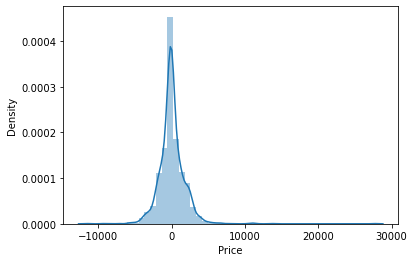

In [126]:
sns.distplot(y_test-pre)

In [127]:
metrics.r2_score(y_test, pre)

0.834477109865371

In [151]:
fi = open('C:/Users/aravi/Downloads/predict_fair_airline_datasets/rands.pkl','wb')
pickle.dump(rands,fi)

In [146]:
fe = open('C:/Users/aravi/Downloads/predict_fair_airline_datasets/Model.pkl','rb')
forest = pickle.load(fe)

In [154]:
er = open('C:/Users/aravi/Downloads/predict_fair_airline_datasets/rands.pkl','rb')
dd = pickle.load(er)

In [155]:
sd = dd.predict(X_test)

In [156]:
sd

array([12680.42937133, 10501.14573443, 13333.94085194, ...,
       12002.44347022, 14742.29210826, 13117.50318062])

In [157]:
metrics.r2_score(y_test,sd)#same we get in last 

0.834477109865371